In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os
import sys
import IPython.display as ipd

In [ ]:
dataset_path = '/content/drive/MyDrive/Miniproject/DATASET/English'

In [ ]:
list_dataset=os.listdir(dataset_path)

In [ ]:
list_dataset

['MaleAngry',
 'MaleHappy',
 'MaleSad',
 'MaleNeutral',
 'FemaleAngry',
 'FemaleHappy',
 'FemaleSad',
 'FemaleNeutral']

In [ ]:
#check for path
a=os.listdir(dataset_path+'/'+list_dataset[0])
print(a)
print(a[0])
print(list_dataset[0])
print(dataset_path+'/'+list_dataset[0]+'/'+a[0])

['MaleAngry26.wav', 'MaleAngry28.wav', 'MaleAngry25.wav', 'MaleAngry27.wav', 'MaleAngry30.wav', 'MaleAngry29.wav', 'MaleAngry32.wav', 'MaleAngry31.wav', 'MaleAngry33.wav', 'MaleAngry35.wav', 'MaleAngry34.wav', 'MaleAngry36.wav', 'MaleAngry9.wav', 'MaleAngry10.wav', 'MaleAngry12.wav', 'MaleAngry22.wav', 'MaleAngry23.wav', 'MaleAngry24.wav', 'MaleAngry21.wav', 'MaleAngry20.wav', 'MaleAngry19.wav', 'MaleAngry18.wav', 'MaleAngry17.wav', 'MaleAngry16.wav', 'MaleAngry15.wav', 'MaleAngry14.wav', 'MaleAngry11.wav', 'MaleAngry13.wav', 'MaleAngry8.wav', 'MaleAngry7.wav', 'MaleAngry6.wav', 'MaleAngry5.wav', 'MaleAngry4.wav', 'MaleAngry3.wav', 'MaleAngry2.wav', 'MaleAngry1.wav', 'MaleAngry38.wav', 'MaleAngry39.wav', 'MaleAngry40.wav', 'MaleAngry41.wav', 'MaleAngry42.wav', 'MaleAngry43.wav', 'MaleAngry44.wav', 'MaleAngry45.wav', 'MaleAngry46.wav', 'MaleAngry47.wav', 'MaleAngry48.wav', 'MaleAngry37.wav', 'MaleAngry71.wav', 'MaleAngry67 (4).wav', 'MaleAngry67 (3).wav', 'MaleAngry67 (2).wav', 'MaleAng

In [ ]:
dataset=pd.DataFrame(columns=['feature'])
n_dataset=pd.DataFrame(columns=['label'])
ct=0
counter=0

In [ ]:
length=len(list_dataset)

for i in range(0,length):
    k=os.listdir(dataset_path+'/'+list_dataset[i])
    j=len(k)
    for u in range(0,j):
        z=list_dataset[i]
        if(z[4]=='h' or z[4]=='H' or z[6]=='h' or z[6]=='H'):
            n_dataset.loc[ct]='Happy'
        elif(z[4]=='a' or z[4]=='A' or z[6]=='a' or z[6]=='A'):
            n_dataset.loc[ct]='Angry'
        elif(z[4]=='n' or z[4]=='N' or z[6]=='n' or z[6]=='N'):
            n_dataset.loc[ct]='Neutral'
        elif(z[4]=='s' or z[4]=='S' or z[6]=='s' or z[6]=='S'):
            n_dataset.loc[ct]='Sad'
        
        ct=ct+1

        X,sample_rate=librosa.load(dataset_path+'/'+list_dataset[i]+'/'+k[u],res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate=np.array(sample_rate)
        mfcc=librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13)
        mfcc=np.mean(mfcc,axis=0)
        dataset.loc[counter]=[mfcc]
        counter=counter+1

In [ ]:
n_dataset

,label
0,Angry
1,Angry
2,Angry
3,Angry
4,Angry
...,...
4335,Neutral
4336,Neutral
4337,Neutral
4338,Neutral


In [ ]:
dataset = pd.concat([n_dataset,pd.DataFrame(dataset['feature'].values.tolist())],axis=1)

In [ ]:
dataset

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,Angry,-16.414091,-12.807028,-11.764467,-8.431463,-3.564120,-0.845265,-2.253844,0.127563,1.663393,0.581787,-0.594931,0.354256,0.064931,-2.988268,-2.947625,-2.533035,-4.481946,-5.312790,-4.806788,-4.541685,-5.012650,-3.132883,-6.707428,-8.199464,-6.609217,-5.948102,-4.968184,-5.705691,-7.307010,-10.044321,-8.853357,-10.004927,-8.568701,-9.094290,-10.675599,-6.062039,-2.274050,-1.999361,-2.740924,...,-7.019797,-7.625874,-9.081565,-10.377628,-13.530747,-11.157769,-10.402462,-10.547135,-10.065311,-11.352360,-13.538991,-13.777434,-14.448925,-12.578969,-12.531216,-12.419521,-13.927512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,0.376056,0.000850,1.273784,2.466390,2.056747,1.405028,1.097857,1.525090,3.805091,3.228485,2.577110,1.905036,1.465192,3.033627,3.002241,1.345464,1.415301,2.112417,2.728945,3.822813,2.775958,-1.964725,-4.624813,-7.977941,-8.602065,-6.656493,-3.489139,-0.795420,0.377629,0.536064,0.541908,-0.041482,-0.314825,-0.915403,-1.488000,-2.842944,1.983250,5.223917,6.284027,...,-8.752234,-8.725377,-9.712202,-10.591917,-7.815973,-6.849728,-6.294823,-3.736903,-3.022717,-1.502573,-1.402705,-1.403724,-0.531021,0.077285,-0.910599,0.202306,1.100807,0.317658,-0.950341,-1.190407,0.570198,1.132791,-0.150665,0.601701,0.199288,0.658230,0.850944,1.211826,-0.365547,-1.846451,-1.349202,-1.565620,-2.828225,-4.115277,-4.347994,-4.116226,-4.621443,-3.861538,-1.795121,-0.746907
2,Angry,-18.065746,-19.220079,-20.317329,-20.856367,-20.394985,-18.616261,-19.659039,-18.777308,-15.879754,-16.143068,-15.869661,-9.984034,-6.612175,-5.852620,-6.126651,-7.406218,-7.323847,-7.404250,-5.749791,-6.548927,-5.912208,-6.430942,-6.134647,-4.469849,-5.978792,-7.339756,-6.611168,-6.625318,-7.016503,-8.320202,-5.639336,-5.704157,-9.270675,-12.007643,-10.264428,-10.047471,-11.887834,-9.252459,-8.800851,...,-1.138220,-2.984129,-3.286739,-3.319815,-4.099044,-4.539824,-4.014122,-3.972011,-4.237689,-3.161868,-2.853792,-3.379591,-3.145716,-3.048456,-5.294572,-4.391278,-2.100987,-2.195766,-4.104060,-6.827705,-7.856207,-10.412466,-7.264656,-7.344765,-10.137211,-12.526875,-12.349775,-8.779163,-4.966130,-5.177330,-7.235049,-6.965291,-7.662517,-6.143242,-4.494637,-5.305740,-6.723966,-4.562036,-2.946747,1.458535
3,Angry,-12.935157,-12.567801,-10.896049,-10.276363,-12.225001,-12.170829,-13.625395,-15.283596,-12.491048,-11.320009,-11.696092,-14.521458,-13.704412,-11.413039,-11.529623,-12.686697,-10.893401,-3.428252,-0.665172,-1.481904,-1.630417,1.339591,0.203390,-2.133764,-2.408893,-1.588626,-2.341184,-3.923381,-5.168541,-3.597244,-3.734568,0.537951,3.766593,3.105037,11.535079,12.897147,10.150024,6.678744,3.049626,...,1.076922,0.962150,2.175362,0.622530,0.467987,1.113790,0.072322,-0.139861,0.226775,0.101954,0.649967,0.213861,0.366668,-2.763220,-5.292899,-5.440188,-6.678510,-9.401626,-8.653566,-5.839061,-4.080806,-0.683837,1.405961,0.995871,1.409514,2.236581,1.325068,1.396336,1.562460,1.472094,0.935438,0.750734,1.414274,1.392579,0.645330,0.990256,0.817554,0.434604,1.798948,5.119405
4,Angry,-1.530420,-2.863430,-6.602247,-8.081483,-7.872797,-6.034759,-4.791504,-5.094658,-4.400574,-4.330380,-5.362004,-7.358887,-8.280565,-8.466749,-8.044075,-8.995782,-10.923862,-15.560228,-17.607790,-18.037394,-14.507715,-7.155973,-3.469168,-3.944642,-5.375957,-6.695809,-6.354531,-5.525364,-2.638115,-1.472597,-2.687393,0.820622,2.110123,1.410118,-0.467623,-3.878658,-6.647750,-7.402840,-9.742219,...,-1.294641,-2.251306,-2.343395,-2.009866,-1.183881,-0.504341,-1.183390,-0.941688,-2.403792,-2.611862,-3.187617,-4.092660,-4.222780,-3.830427,-5.291793,-4.919675,-5.672066,-4.380569,-4.267721,-3.501857,-3.298032,-3.237027,-2.766246,-4.239726,-3.588122,-4.449461,-4.257594,-3

In [ ]:
dataset=dataset.fillna(0)

In [ ]:
y=dataset.iloc[:,0]
X=dataset.iloc[:,1:218]

In [ ]:
dataset=dataset.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3255
1085
3255
1085


In [ ]:
mean=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)

X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
3978,-0.202622,-0.291637,-0.374069,-0.044775,0.598522,0.904336,0.732873,0.460561,0.522635,0.480552,0.383356,0.339108,0.171151,-0.004536,0.194358,0.305391,0.258244,0.133613,-0.099727,-0.188568,0.145706,0.634433,0.704241,0.529527,0.298112,0.101399,0.051745,0.170062,0.106748,-0.000621,0.085241,0.311115,0.287319,0.125824,0.110218,0.183922,0.304224,0.404501,0.409940,0.544738,...,-0.416174,-0.375830,-0.531205,-0.601413,-0.575288,-0.778833,-0.670702,-0.537479,-0.667475,-0.816819,-0.867250,-0.811735,-0.798667,-1.008361,-1.129638,-1.193818,-1.309621,1.109403,1.109325,1.105912,1.105842,1.106743,1.108157,1.102728,1.099327,1.096707,1.094525,1.082914,1.079392,1.061820,1.057509,1.045457,1.048156,1.047751,1.052241,1.044494,1.041245,1.035414,0.947747,0.810258
1448,1.005794,0.899643,0.504330,0.553078,0.426821,0.352585,0.425178,0.582880,0.472891,0.447471,0.581056,0.504338,0.720968,0.748145,0.540694,0.391345,0.171716,0.278828,0.473224,0.601403,0.703829,0.764081,0.694205,0.591140,0.613080,0.490834,0.238791,0.318096,0.291172,0.156245,0.106482,0.287730,0.212818,0.157794,0.164896,0.184279,0.269095,0.299910,0.316545,0.243837,...,0.001829,0.035013,0.055407,0.198477,0.134081,0.058529,0.094626,0.075912,0.078045,-0.102035,-0.144332,-0.061958,-0.093261,-0.476390,1.112538,1.113673,1.110233,1.109403,1.109325,1.105912,1.105842,1.106743,1.108157,1.102728,1.099327,1.096707,1.094525,1.082914,1.079392,1.061820,1.057509,1.045457,1.048156,1.047751,1.052241,1.044494,1.041245,1.035414,0.947747,0.810258
2664,1.736553,1.749721,1.870279,1.809261,1.611443,1.626916,1.634908,1.561010,1.557349,1.632138,1.790542,1.868404,1.812099,1.735481,1.704988,1.436855,1.408582,1.340037,1.392631,1.499467,1.369080,1.321885,1.320165,1.408748,1.460885,1.384622,1.485075,1.492005,1.689890,1.841136,1.734345,1.958021,2.081622,1.790845,1.878568,1.800292,1.594282,1.756457,1.877750,1.866843,...,1.191269,1.088816,1.104519,1.040235,0.973195,0.998453,0.983585,0.903883,0.812510,0.650855,0.717226,0.759482,0.884438,1.021722,1.110091,1.159215,1.246563,1.266602,1.081511,1.119639,1.186513,1.149872,1.103099,1.174623,1.227166,1.180073,1.223198,1.235330,1.195653,1.122044,0.972232,1.015574,0.938349,0.873260,0.782271,0.809698,0.651537,0.737020,0.685610,0.595271
17,-2.402320,-2.309125,-1.985215,-1.859151,-1.914367,-2.068681,-2.277878,-1.845652,-0.988694,-0.485181,-0.265703,-0.004381,0.483383,0.727196,0.923902,1.149170,1.263697,1.224328,1.181130,1.214811,1.187547,1.157493,1.240897,1.283143,1.359232,1.373507,1.388699,1.419199,1.417480,1.274559,1.000835,0.959044,0.794317,0.657481,0.455851,0.395371,0.367281,0.214073,0.262461,0.465724,...,0.580793,0.559853,0.570806,0.646111,0.616016,0.522628,0.373561,0.442846,0.592063,0.608961,0.479001,0.296631,0.181935,-0.109955,-0.230874,-0.635530,-0.732731,-0.723778,-0.760084,-0.758370,-0.679400,-0.722688,-0.660983,-0.693698,-0.503625,-0.366878,0.063654,0.250503,0.325797,0.261832,0.170590,0.358934,0.384909,0.143070,0.030090,-0.059466,-0.125989,-0.133581,-0.411142,-0.662609
1634,-0.613736,-0.556624,-0.303698,-0.043086,0.033857,-0.148665,0.013740,0.099561,-0.007051,0.027496,0.059024,0.135633,0.066538,0.087858,0.245584,0.278071,0.197854,0.341269,0.413827,0.273069,0.394390,0.342084,0.239397,0.430690,0.403803,0.556004,0.720188,0.623421,0.779724,0.857484,0.899090,0.922702,1.066496,1.159800,1.313876,1.444371,1.438738,1.447267,1.408047,1.449831,...,0.947154,0.885933,0.734378,0.692820,0.435428,0.235216,0.351937,0.453978,0.390031,0.459678,0.453112,0.389854,0.401856,0.402968,0.451258,0.403072,0.474405,0.699815,0.678228,0.781371,1.069997,1.186813,1.177415,1.248581,1.212314,1.254336,1.199814,1.157302,1.153021,1.063867,1.039673,1.178446,1.138243,1.152031,1.172632,1.167450,1.129239,1.121555,0.941033,0.814166
...,...,...,...,

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils

In [ ]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [ ]:
new_set = set(y) 
print("No of unique items in the list are:", len(new_set))

No of unique items in the list are: 4


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *

In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3255, 216)
(3255, 4)
(1085, 216)
(1085, 4)


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
204/204 [==============================] - 73s 359ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 1.5912 - val_accuracy: 0.6995
Epoch 2/25
204/204 [==============================] - 75s 366ms/step - loss: 0.0559 - accuracy: 0.9856 - val_loss: 1.7065 - val_accuracy: 0.6608
Epoch 3/25
204/204 [==============================] - 75s 370ms/step - loss: 0.0285 - accuracy: 0.9899 - val_loss: 1.6287 - val_accuracy: 0.7069
Epoch 4/25
204/204 [==============================] - 75s 368ms/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 1.4851 - val_accuracy: 0.7161
Epoch 5/25
204/204 [==============================] - 74s 365ms/step - loss: 0.0189 - accuracy: 0.9957 - val_loss: 1.5239 - val_accuracy: 0.7005
Epoch 6/25
204/204 [==============================] - 75s 367ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 1.4601 - val_accuracy: 0.7115
Epoch 7/25
204/204 [==============================] - 74s 365ms/step - loss: 0.0568 - accuracy: 0.9856 - val_loss: 1.4671 - val_ac

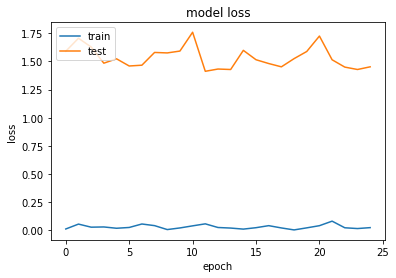

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

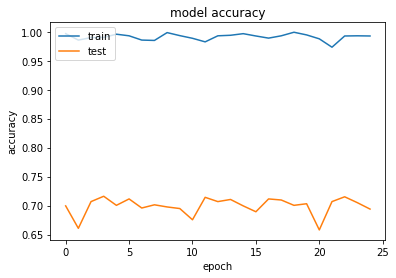

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()